# Import Packages

In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_DIRECTORY = os.getcwd()

# Read Data

In [2]:
filepath = os.path.join(DATA_DIRECTORY, 'ETOPO1_Ice_g_geotiff.tif')
raster = rasterio.open(filepath)
raster_height = raster.read(1)
raster.profile

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 21601, 'height': 10801, 'count': 1, 'crs': None, 'transform': Affine(0.016666666666666666, 0.0, -180.00833333333333,
       0.0, -0.016666666666666663, 90.00833333333334), 'tiled': False, 'interleave': 'band'}

# Examine Min/Max Data

In [3]:
max_height = np.amax(raster_height)
max_height_indices = np.where(raster_height == max_height)
max_height_lat_lon = raster.xy(max_height_indices[0][0], max_height_indices[1][0])

print("Max Height: ", max_height)

print("Lat Index: ", max_height_indices[1][0])
print("Lon Index: ", max_height_indices[0][0])

print("Lat: ", max_height_lat_lon[1])
print("Lon: ", max_height_lat_lon[0])

Max Height:  8271
Lat Index:  16016
Lon Index:  3721
Lat:  27.98333333333335
Lon:  86.93333333333334


In [4]:
min_height = np.amin(raster_height)
min_height_indices = np.where(raster_height == min_height)
min_height_lat_lon = raster.xy(min_height_indices[0][0], min_height_indices[1][0])

print("Min Height: ", min_height)

print("Lat Index: ", min_height_indices[1][0])
print("Lon Index: ", min_height_indices[0][0])

print("Lat: ", min_height_lat_lon[1])
print("Lon: ", min_height_lat_lon[0])

Min Height:  -10898
Lat Index:  19331
Lon Index:  4719
Lat:  11.350000000000023
Lon:  142.18333333333334


# Plot Data

In [5]:
def plot_elevation_path(latitude, longitude, raster, raster_height):
    # Get the first part of the path
    raster_index = raster.index(longitude, latitude)
    lat_index = raster_index[0]
    lon_index = raster_index[1]
    heights = [raster_height[i, lon_index] for i in range(raster.height)]
    
    # Get the other half of the path
    inv_lon = -(180 - longitude)
    inv_raster_index = raster.index(inv_lon, -latitude)
    inv_lat_index = inv_raster_index[0]
    inv_lon_index = inv_raster_index[1]
    inv_heights = [raster_height[i, inv_lon_index] for i in range(raster.height)]
    
    # Combine the two paths
    combined = heights + inv_heights
    # Reverse the path in order
    combined_reverse = combined[::-1]
    combined_reverse_lat_index = len(combined) - lat_index - 1
    
    axes = plt.gca()
    # Mariana Trench is 11K+ meters deep!
    axes.set_ylim([-11000,11000])
    plt.plot(combined_reverse)
    plt.plot(
        [combined_reverse_lat_index],
        [combined_reverse[combined_reverse_lat_index]],
        marker='o',
        markersize=10,
        color="red"
    )

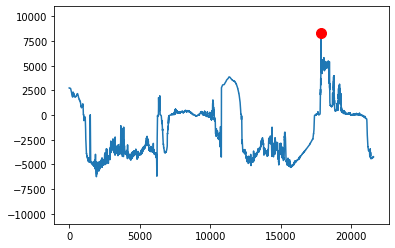

In [6]:
# Mt. Everest
lat = max_height_lat_lon[1]
lon = max_height_lat_lon[0]
plot_elevation_path(lat, lon, raster, raster_height)

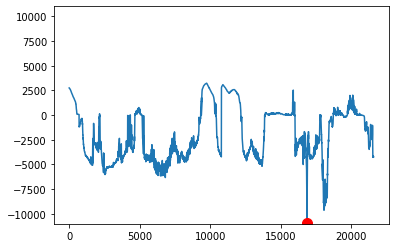

In [7]:
# Mariana Trench
lat = min_height_lat_lon[1]
lon = min_height_lat_lon[0]
plot_elevation_path(lat, lon, raster, raster_height)